# Cashback analysis


- Merchant wise
- Month wise 
- Year wisw
- Weekend wise


In [5]:
import pandas as pd
# load df
df = pd.read_csv('./datasource/preprocessed_data.csv')

## Merchant Wise


### Whole Dataset 2021 - 2024

In [6]:
import datetime
data = df

# Convert the 'Conversion Time' to datetime format
data['Conversion Time'] = pd.to_datetime(data['Conversion Time'], format='%d/%m/%Y %H:%M')

# Group by 'Advertiser' and sum the 'Estimate M1 Cashback Value'
data['Estimate M1 Cashback Value'] = pd.to_numeric(data['Estimate M1 Cashback Value'], errors='coerce')
cashback_analysis = data.groupby('Advertiser')['Estimate M1 Cashback Value'].sum().reset_index()

# Rename columns for clarity
cashback_analysis.columns = ['Advertiser', 'Total Cashback Value']


cashback_analysis

,Advertiser,Total Cashback Value
0,Adidas,23.183
1,Agoda,129.319
2,AliExpress (Global) - CPS,0.566
3,Charles & Keith (SG) CPS,8.183
4,Decathlon,0.253
5,Decathlon SG,8.928
6,EnfaStore,27.590
7,Fairprice ON,119.281
8,KFC,8.000
9,Klook,7.870


In [7]:

import plotly.express as px

# Plotting the Total Cashback Value for each Advertiser
fig = px.bar(cashback_analysis, x='Advertiser', y='Total Cashback Value', title='Sum of Cashback by Advertiser 2021 - 2024')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


### Year Specific

In [8]:

# unique uears
data['Year'] = data['Conversion Time'].dt.year
unique_years = data['Year'].unique()
unique_years

array([2024, 2023, 2022, 2021], dtype=int32)

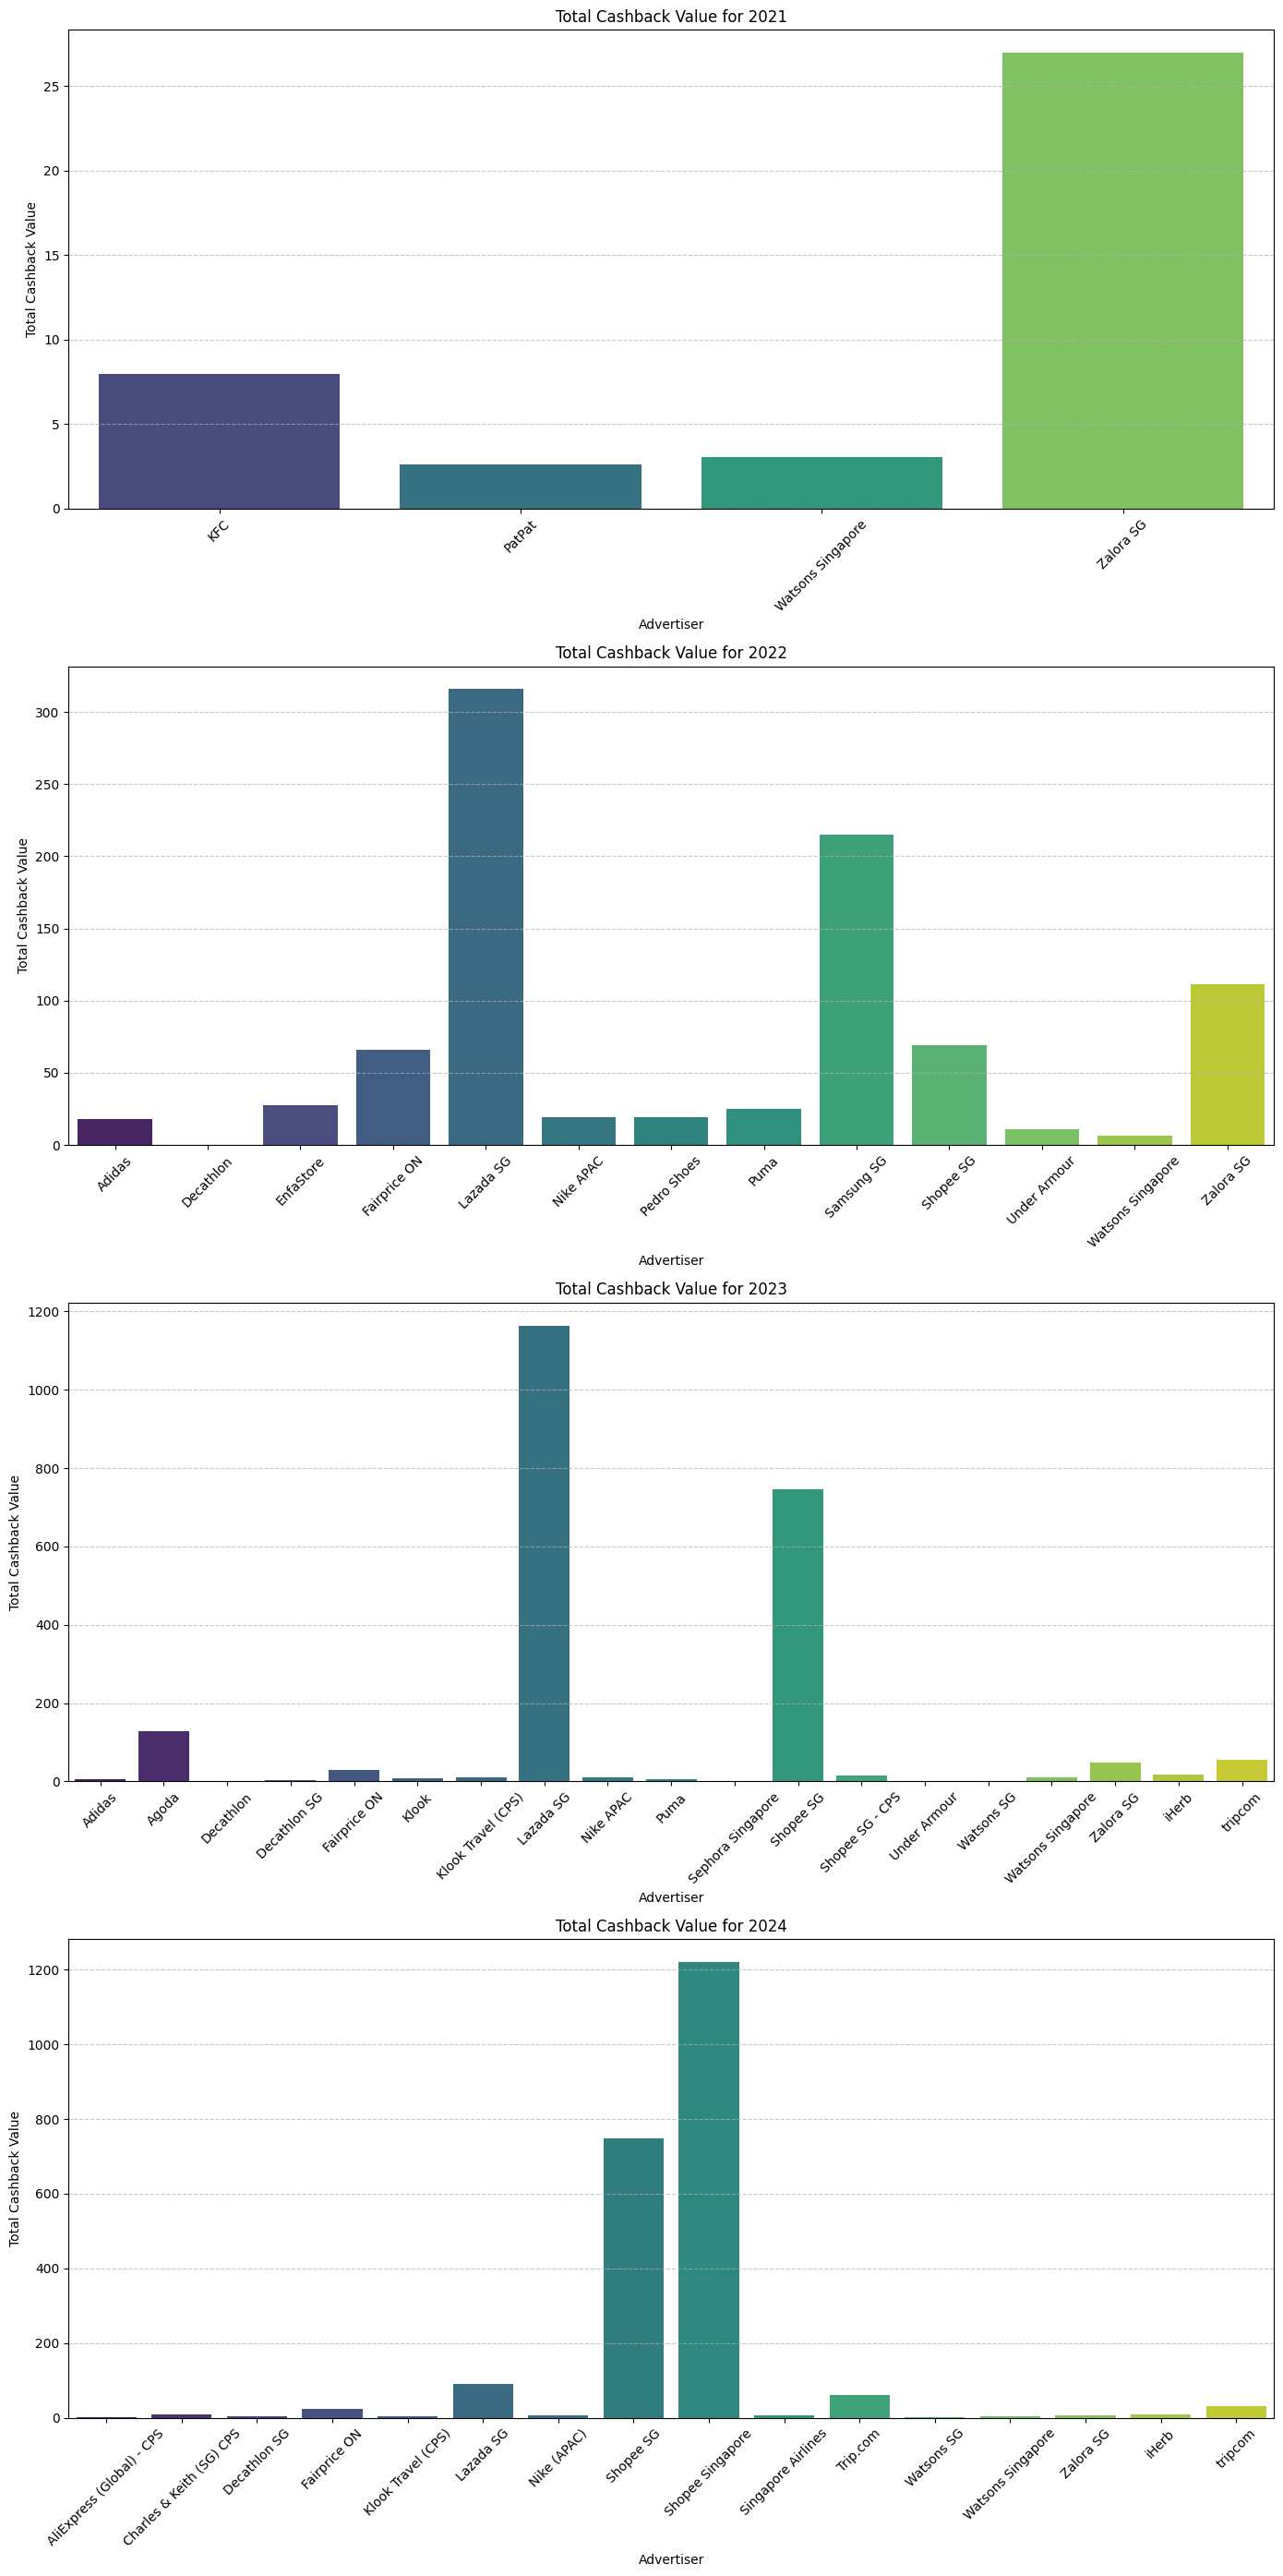

In [11]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# Convert the 'Conversion Time' to datetime format
data['Conversion Time'] = pd.to_datetime(data['Conversion Time'], format='%d/%m/%Y %H:%M')

# Extract the year from 'Conversion Time'
data['Year'] = data['Conversion Time'].dt.year

# Group by 'Year' and 'Advertiser' and sum the 'Estimate M1 Cashback Value'
data['Estimate M1 Cashback Value'] = pd.to_numeric(data['Estimate M1 Cashback Value'], errors='coerce')
yearly_cashback_analysis = data.groupby(['Year', 'Advertiser'])['Estimate M1 Cashback Value'].sum().reset_index()
# Plotting
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 28))

years = sorted(yearly_cashback_analysis['Year'].unique())

for i, year in enumerate(years):
    yearly_data = yearly_cashback_analysis[yearly_cashback_analysis['Year'] == year]
    sns.barplot(data=yearly_data, x='Advertiser', y='Estimate M1 Cashback Value', ax=axes[i], hue='Advertiser', legend=False, palette='viridis')
    axes[i].set_title(f'Total Cashback Value for {year}')
    axes[i].set_ylabel('Total Cashback Value')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Ensure x-axis labels are shown for every plot
    for label in axes[i].get_xticklabels():
        label.set_visible(True)

plt.tight_layout()
plt.show()





### Plotly

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot figure with 4 rows and 1 column
fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=[f"Total Cashback Value for {year}" for year in years])

# Add a bar plot for each year to the subplot
for i, year in enumerate(years):
    yearly_data = yearly_cashback_analysis[yearly_cashback_analysis['Year'] == year]
    fig.add_trace(
        go.Bar(x=yearly_data['Advertiser'], y=yearly_data['Estimate M1 Cashback Value'], name=f"{year}"),
        row=i+1, col=1
    )
    

# Update layout for the subplot figure
fig.update_layout(height=1600, width=900, title_text="Total Cashback Value by Advertiser (2021 - 2024)")
fig.update_xaxes(tickangle=45, title_text="Advertiser")

# Show the figure
fig.show()


## Month Wise

In [13]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import calendar
data = df
# Assuming you have 'data' and 'years' defined appropriately

# Group by year and month to get monthly cashback analysis
data['Month'] = data['Conversion Time'].dt.month
monthly_cashback_analysis = data.groupby(['Year', 'Month'])['Estimate M1 Cashback Value'].mean().reset_index()

# Create separate figures for each year
figures = []

for year in years:
    yearly_data = monthly_cashback_analysis[monthly_cashback_analysis['Year'] == year]

    # Create a new figure for each year
    fig = go.Figure()

    # Add a bar plot for the specific year
    fig.add_trace(
        go.Bar(x=yearly_data['Month'], y=yearly_data['Estimate M1 Cashback Value'], name=f"{year}")
    )

    # Update layout for the figure
    fig.update_layout(
        title=f"Total Cashback Value for {year}",
        xaxis_title="Month",
        yaxis_title="Total Cashback Value",
        xaxis=dict(
            tickvals=list(range(1, 13)),
            ticktext=[calendar.month_abbr[m] for m in range(1, 13)]
        ),
        height=600,
        width=900
    )

    # Append the figure to the list of figures
    figures.append(fig)

# Show each figure separately
for fig in figures:
    fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import calendar


data['Month'] = data['Conversion Time'].dt.month
monthly_cashback_analysis = data.groupby(['Year', 'Month'])['Estimate M1 Cashback Value'].sum().reset_index()

fig = make_subplots(rows=4, cols=1, shared_xaxes=True, subplot_titles=[f"Total Cashback Value for {year}" for year in years])

# Add a bar plot for each year and month to the subplot
for i, year in enumerate(years):
    yearly_data = monthly_cashback_analysis[monthly_cashback_analysis['Year'] == year]
    fig.add_trace(
        go.Bar(x=yearly_data['Month'], y=yearly_data['Estimate M1 Cashback Value'], name=f"{year}"),
        row=i+1, col=1
    )

# Update layout for the subplot figure
fig.update_layout(height=1600, width=900, title_text="Total Cashback Value by Month (2021 - 2024)")

# Explicitly set x-axis labels for each subplot
months = [calendar.month_abbr[m] for m in range(1, 13)]
for i in range(4):
    fig.update_xaxes(
        tickvals=list(range(1, 13)),
        ticktext=months,
        row=i+1, col=1
    )

# Show the figure
fig.show()

In [ ]:
grouped = df.groupby(["Year", "Month"])["Advertiser"]

# Iterating over groups or accessing specific groups
for group, advertisers in grouped:
    print(group)
    print(advertisers.tolist())
    print()

(2021, 11)
['KFC', 'Zalora SG', 'Zalora SG', 'PatPat', 'Watsons Singapore', 'Watsons Singapore', 'Watsons Singapore', 'Watsons Singapore', 'Watsons Singapore', 'Watsons Singapore', 'Watsons Singapore']

(2021, 12)
['Zalora SG', 'KFC', 'Zalora SG', 'Zalora SG', 'Zalora SG', 'KFC', 'KFC', 'Zalora SG']

(2022, 1)
['Adidas', 'Watsons Singapore', 'Zalora SG']

(2022, 3)
['Lazada SG', 'Lazada SG', 'Lazada SG', 'Adidas', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Puma', 'Watsons Singapore']

(2022, 4)
['Zalora SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Zalora SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada SG', 'Lazada 

## Seasonal trends

In [ ]:
df

,Conversion ID,Advertiser,Status,Conversion Time,Estimate M1 Cashback Value,Year,Month
0,4ce2be5b098a4122b60c5959890b61dc-1,Shopee Singapore,Pending,2024-06-10 23:35:00,20.448,2024,6
1,98d7396291e1428497d4fe2ff632a432-1,Shopee Singapore,Pending,2024-06-10 21:58:00,34.272,2024,6
2,ff89a960824142ce8db6e24fac773abb-1,Shopee Singapore,Pending,2024-06-10 21:58:00,5.728,2024,6
3,992fb4ca916f450fac0c3a7bf8e65709-1,Shopee Singapore,Pending,2024-06-10 14:34:00,2.799,2024,6
4,02a9552ad3b34b5690c5656c1b2440c8-1,Shopee Singapore,Pending,2024-06-10 14:34:00,2.790,2024,6
...,...,...,...,...,...,...,...
11230,e7fc921a109d47bfb7425b8a3cf8b7a4-1,Watsons Singapore,Approved,2021-11-16 21:05:00,0.401,2021,11
11231,de54d92e124d4b3296ee4ba8e52c457a-1,Watsons Singapore,Approved,2021-11-13 09:23:00,0.471,2021,11
11232,3a2694a088af4072a730f06b2571913c-1,Watsons Singapore,Approved,2021-11-11 11:09:00,0.096,2021,11
11233,17c74deaa4564c5a94e92e5084498231-1,Watsons Singapore,Approved,2021-11-10 21:48:00,0.104,2021,11


### Monthly Cashback Trends

In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import calendar
data = df
# Perform monthly cashback analysis
data['Month'] = data['Conversion Time'].dt.month
monthly_cashback_analysis = data.groupby(['Year', 'Month'])['Estimate M1 Cashback Value'].sum().reset_index()

# Step 1: Create a line plot for each year
fig = px.line(
    monthly_cashback_analysis,
    x='Month',
    y='Estimate M1 Cashback Value',
    color='Year',
    title='Monthly Cashback Value Trends',
    labels={'Month': 'Month', 'Estimate M1 Cashback Value': 'Total Cashback Value'}
)

# Update x-axis labels to show month names
fig.update_xaxes(tickvals=list(range(1, 13)), ticktext=[calendar.month_abbr[m] for m in range(1, 13)])

fig.show()

# Step 2: Calculate average monthly cashback values
average_monthly_cashback = monthly_cashback_analysis.groupby('Month')['Estimate M1 Cashback Value'].mean().reset_index()

# Step 3: Plot the average monthly values
fig_avg = px.line(
    average_monthly_cashback,
    x='Month',
    y='Estimate M1 Cashback Value',
    title='Average Monthly Cashback Value Trends',
    labels={'Month': 'Month', 'Estimate M1 Cashback Value': 'Average Cashback Value'}
)

# Update x-axis labels to show month names
fig_avg.update_xaxes(tickvals=list(range(1, 13)), ticktext=[calendar.month_abbr[m] for m in range(1, 13)])

fig_avg.show()


### Top Advertisers

In [ ]:
# Calculate the total cashback values for each advertiser
top_advertisers = data.groupby('Advertiser')['Estimate M1 Cashback Value'].sum().reset_index()

# Identify the top advertisers
top_advertisers = top_advertisers.sort_values(by='Estimate M1 Cashback Value', ascending=False).head(10)

# Display the top advertisers
top_advertisers


,Advertiser,Estimate M1 Cashback Value
11,Lazada SG,1571.389
19,Shopee SG,1562.582
21,Shopee Singapore,1220.903
17,Samsung SG,215.241
27,Zalora SG,193.208
1,Agoda,129.319
7,Fairprice ON,119.281
29,tripcom,87.250
23,Trip.com,59.976
16,Puma,30.529


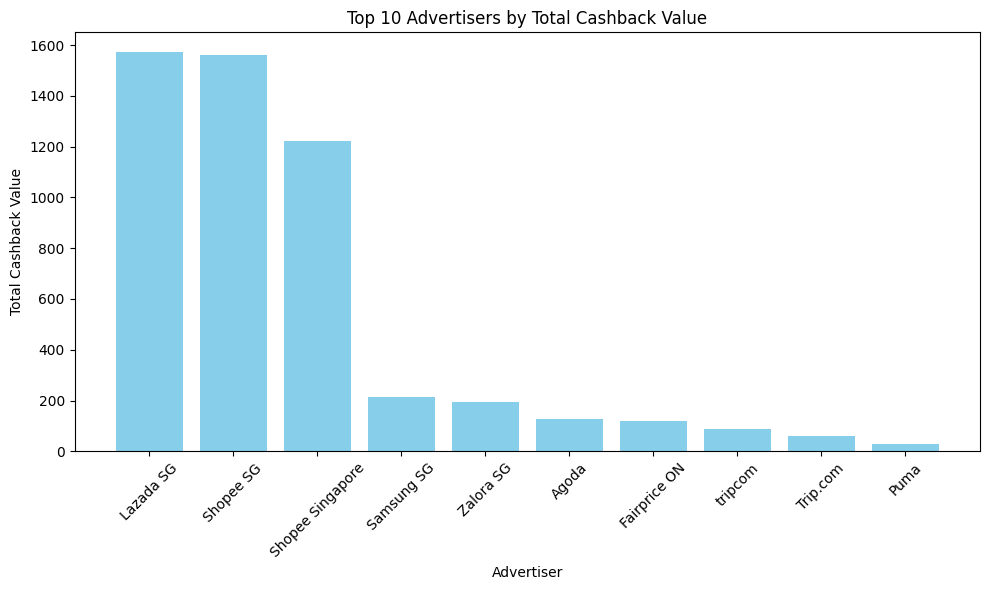

In [ ]:
# Sort the top advertisers by cashback value
top_advertisers = top_advertisers.sort_values(by='Estimate M1 Cashback Value', ascending=False).head(10)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_advertisers['Advertiser'], top_advertisers['Estimate M1 Cashback Value'], color='skyblue')
plt.xlabel('Advertiser')
plt.ylabel('Total Cashback Value')
plt.title('Top 10 Advertisers by Total Cashback Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Monthly contribution


The "monthly contribution" analysis helps determine the percentage contribution of each month to the total annual cashback values. 

In [ ]:
# Calculate the monthly contribution to the annual cashback values
monthly_contribution = data.groupby(['Year', 'Month'])['Estimate M1 Cashback Value'].sum().reset_index()
monthly_contribution['Annual Total'] = monthly_contribution.groupby('Year')['Estimate M1 Cashback Value'].transform('sum')
monthly_contribution['Monthly Contribution (%)'] = (monthly_contribution['Estimate M1 Cashback Value'] / monthly_contribution['Annual Total']) * 100

# Display the monthly contribution
monthly_contribution


,Year,Month,Estimate M1 Cashback Value,Annual Total,Monthly Contribution (%)
0,2021,11,13.200,40.679,32.449175
1,2021,12,27.479,40.679,67.550825
2,2022,1,3.824,904.240,0.422897
3,2022,3,12.231,904.240,1.352628
4,2022,4,99.281,904.240,10.979497
5,2022,5,79.229,904.240,8.761944
6,2022,6,71.243,904.240,7.878771
7,2022,7,53.793,904.240,5.948974
8,2022,8,64.148,904.240,7.094134
9,2022,9,189.905,904.240,21.001615


### Monthly Peaks and Drops

in every month from average cashback sum peaks and drops


In [ ]:
import plotly.express as px

# Aggregate monthly data across all years
monthly_trends = data.groupby('Month')['Estimate M1 Cashback Value'].sum().reset_index()

# Plot the monthly trends
fig = px.line(
    monthly_trends,
    x='Month',
    y='Estimate M1 Cashback Value',
    title='Seasonal Peaks and Troughs',
    labels={'Month': 'Month', 'Estimate M1 Cashback Value': 'Total Cashback Value'}
)

# Update x-axis labels to show month names
fig.update_xaxes(tickvals=list(range(1, 13)), ticktext=[calendar.month_abbr[m] for m in range(1, 13)])

fig.show()
